**Lab 3: Spectral Representation**

The goal of this lab is to gain familiarity with the spectral representations of signals, specially the spectrograms.

In [1]:
import os
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
from IPython.display import Audio
from util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram, plot_spectrum_at

ModuleNotFoundError: No module named 'util'

First upload your reference signal and plot the first seconds of it.

In [133]:
filepath="sis1_group4ukelele.wav"
ref,fs=load_audio(filepath)
Audio(ref,rate=fs)

In [134]:
f0=457.12
T=1/f0
t_start = 0.1
t_end = t_start+4*T
plot_signals(ref, fs, t_start=t_start, t_end=t_end)

# **Exercises**

**1. Spectrograms**

A spectrogram is obtained by estimating the frequency content in short sections of the signal. The magnitude of the spectrum over individual sections is plotted as intensity or color on a two-dimensional plot versus frequency and time. The length of each section, or window length, determines the frequency resolution. Longer windows give good frequency resolution but fail to
track frequency changes well. Shorter windows have poor frequency resolution, but good tracking.

In Python the function `spectrogram` from the `scipy.signal` package will
compute the spectrogram. A common call to the function is defined as follows. No need to understand the meaning of each parameter at this stage. Note that we provide the `plot_spectrogram` function to plot the spectrogram.

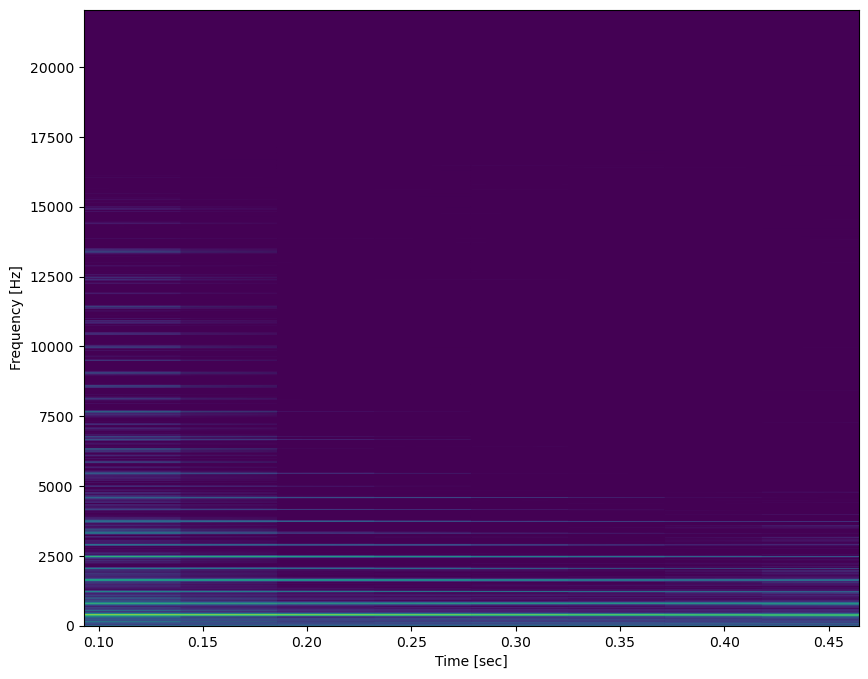

In [135]:
from scipy.signal import spectrogram
import numpy

A = 0.4
f0 = 457.12
fs = 44100
phi = np.pi/2
t = np.arange(0, .1, 1.0/fs)
x1 = A * np.exp(1j*(2*f0*np.pi*t + phi))

windows_len = 8192
fs, tt, S = spectrogram(ref, fs, nperseg=windows_len, noverlap= windows_len/2)


plt.figure(figsize=(10,8))
plot_spectrogram(fs, tt, S)
plt.show()

We can plot the spectrum (one slice of the spectrogram) of the signal at an specific time using the `plot_spectrum_at` function. For instance, we can see the spectrum of the signal at the 0.5 seconds:

In [136]:
plot_spectrum_at(fs, tt, S, 0.20)

1.1. Calculate and plot the spectrogram of your reference signal. Use `plt.ylim` to select the limits of the y axis in order to zoom in the frequency region of interest. For instance if you want to see the region between 0 and 4000 Hz, you can call `plt.ylim([0, 4000])` after the `plot_spectrogram` function.


(0.0, 6000.0)

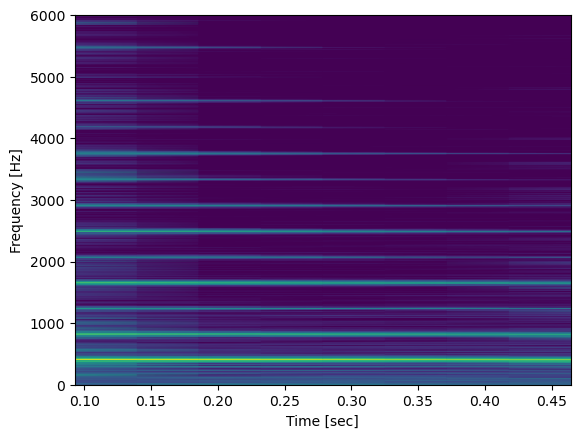

In [137]:
# Write the code here
plot_spectrogram(fs, tt, S)
plt.ylim([0, 6000])

1.2. Select a time where almost all harmonics are present and plot the spectrum at that time.

In [138]:
plot_spectrum_at(fs, tt, S, 0.25)

1.3. Use the cursor for measuring the weights of the fundamental frequency and some harmonics (6-10)

In [139]:
weights = [1, 0.1688, 0.0137, 0.13, 0.0064, 0.0282, 0.0082, 0.00179, 0.000439] # Fill this list with the measured weights

**2. Synthesis**:

Let's define a function to synthetize an harmonic singal which receives the fundamental frequency ($f_0$) and the weights ($A_k$) of each harmonic and the time vector ($t$). This is similar to what you did in Lab 3- Ex3.2.


In [140]:
def synthesize(f0, phi, Ak, t, amplitude):
  y = 0
  for k in range(1, len(Ak) + 1):
    y += Ak[k-1] * np.cos(2*np.pi*k*f0*t +
    k*phi - (k-1)*np.pi/2)
    y = amplitude * y/np.amax(y) 
  return y

2.1. Use the `synthetize` function to generate a synthesis with the weights ($A_k$) found in 1.3 and the fundamental frequency and phases found in previous labs. Plot both the reference and the synthetize signal. Listen to the synthetize signal.

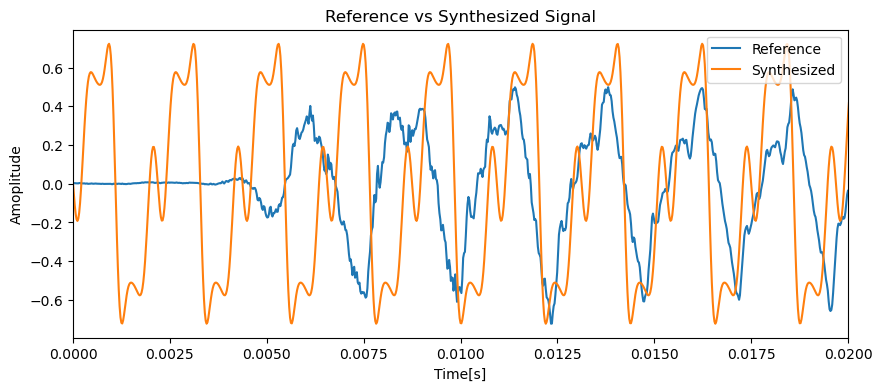

In [141]:
fs = 44100
f0 = 457.12
phi = 3*np.pi/2

time = np.arange(0, len(ref)/fs, 1/fs)
y = synthesize(f0, phi, weights, time, A)
y = np.max(np.abs(ref))*y/np.max(np.abs(y))

plt.figure(figsize=(10,4))
plt.plot(time, ref, label='Reference')
plt.plot(time, y, label='Synthesized')
plt.xlim(0, .02)
plt.xlabel('Time[s]')
plt.ylabel('Amoplitude')
plt.title('Reference vs Synthesized Signal')
plt.legend()

In [142]:
# Write the code here
fs=44100
duration=1.0
t=numpy.arange(0,duration, 1.0/fs)
A = 0.4
amplitude=A
f0 = 457.12
fs = 44100
phi=3*np.pi/2   
S_synt = synthesize(f0, phi, weights, t,A)

S_ref = A * np.sin(2 * np.pi * f0 * t)
S_synt = synthesize(f0, phi, weights, t,A)

period = 1.0/f0
t_start = 0.0 
t_end = t_start + 3*period 
plot_signals([S_ref, S_synt], fs, 
             t_start=t_start, 
             t_end=t_end, 
             name=["Reference Signal (S_ref)", "Synthesized Signal (S_synt)"])



2.2. Calculate the spectrogram of the synthesized signal `S_synt`; and compare the spectrums of both signals at the same time using `plot_spectrum_at(ff, tt, [S_ref, S_synt], time)`, where `S_ref`is spectrogram of the reference signal.

**Note:** use the same window length to calculate both spectrograms.

In [143]:
ff, tt, S_synt = spectrogram(y, fs=fs, nperseg=1024, noverlap=512)
ff, tt, S_ref = spectrogram(ref, fs=fs, nperseg=1024, noverlap=512)
time=np.clip(t_start+(t_end-t_start)/2, tt.min(), tt.max())

plot_spectrum_at(ff, tt, [S_ref, S_synt], time)

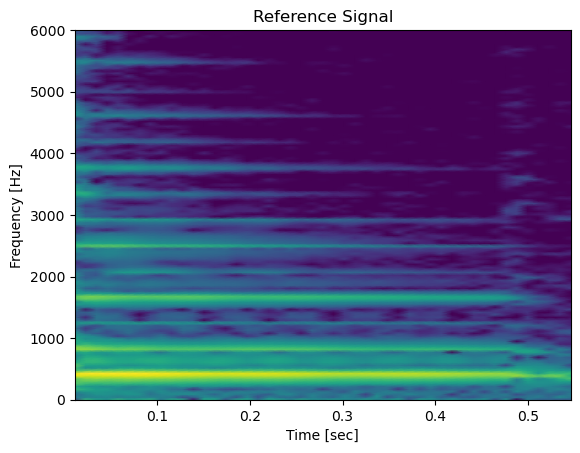

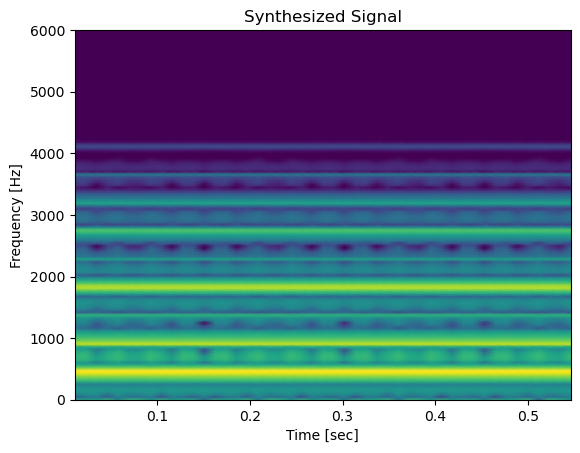

In [144]:
plot_spectrogram(ff, tt, S_ref)
plt.title('Reference Signal')
plt.ylim([0, 6000])
plt.show()

plot_spectrogram(ff, tt, S_synt)
plt.title('Synthesized Signal')
plt.ylim([0, 6000])
plt.show()

2.3. Compare the spectrograms of the two signals. What are the main differences?

In [145]:
# Write the code here
Audio(ref, rate=fs)

2.4. Listen to the two audios (reference and synthesized). What are the main differences?

In [146]:
# Write the code here
Audio(y, rate=fs)